In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangla/1120.pdf


Task 1: Project Setup & Team Coordination
Assigned to:
Md. Mahmudun Nobi
Objective:
Establish the workspace, tools, and roles so the team can collaborate effectively.
Inputs
No prior inputs (starting point).
Detailed Steps
1.
Create a Shared Repository
Use GitHub or GitLab for version control.
Initialize a clear folder structure:
data/
(for raw and processed data)
scripts/
(for code)
models/
(for trained models)
docs/
(for documentation)
results/
(for outputs or artifacts)
2.
List Team Roles & Responsibilities
Confirm each of the following tasks (2–25) is assigned to one team member.
Publish the roles in a shared document or project board.
3.
Set Up Version Control Rules
Decide on a branching strategy (e.g.,
main
branch for stable).
Enforce reviews or pull requests for quality control.
4.
Document Required Tools
Python, OCR software, Bangla NLP libraries (e.g., bnltk, PyBangla, etc.).
Provide
requirements.txt
or
environment.yml
for easy setup.
Final Outputs
A functioning version-control repository.
A public list assigning tasks to each team member.
Basic setup instructions in
docs/
or
README.md
.
Task 2: PDF Extraction & Verification
Assigned to:
Aman Ullah
Objective:
Convert the Bangla PDF into text (using direct extraction or OCR) and verify no data islost.
Inputs
Bangla PDF file(s).
Repository and environment (Task 1).
Detailed Steps
1.
Check PDF Type
If text-based, use
pdftotext
or similar.
If scanned, set up Bangla OCR (e.g., Tesseract with Bangla language pack).
2.
Extract Text
For text-based PDF:
pdftotext input.pdf output.txt
.
For scanned PDF: run each page through OCR, combine results.
3.
Combine & Label
Merge all text outputs into one file or a structured format (e.g., JSON).
Label each page or section for traceability.
4.
Manual Verification
Randomly check paragraphs for accuracy.
Note any corrupted pages or garbled text in a short report.
Final Outputs
raw_extracted.txt
or
raw_extracted.json
containing all text.
A short verification log noting any anomalies.
Task 3: Section/Chapter Segmentation
Assigned to:
MD. Mahabur Rahman
Objective:
Split the extracted text into logical sections, chapters, or headings.
Inputs
Extracted text from Task 2.
Detailed Steps
1.
Identify Section Boundaries
Look for headings, page breaks, or known markers.
Consider manual review if the PDF doesn’t have clear headings.
2.
Create Segmentation Rules
For example, search for headings in all caps or numeric chapter titles.
Alternatively, use page-based segmentation if structure is consistent.
3.
Generate Structured Output
Save each segment with a unique ID (e.g.,
section_001
,
section_002
).
Store them in
segmented_data.json
.
4.
Validate Samples
Check a few sections manually to ensure correct boundaries.
Final Outputs
segmented_data.json
(or similar format) with each section labeled.
Brief note on the segmentation criteria used.
Task 4: Basic Cleanup & Formatting
Assigned to:
Md Khairul Kabir Simul
Objective:
Remove extraneous line breaks, unify encoding, and ensure consistent formatting.
Inputs
Segmented text from Task 3.
Detailed Steps
1.
Ensure UTF-8 Encoding
Convert files to UTF-8 if needed.
Check for any stray BOM (Byte Order Mark) characters.
2.
Remove Unwanted Spaces
Trim trailing or leading whitespace.
Merge lines that were incorrectly split.
3.
Preserve Meaningful Paragraphs
Keep paragraph boundaries if relevant.
Use a consistent delimiter (e.g., newline or special token).
4.
Review Special Characters
Ensure any Bangla punctuation or diacritics remain intact.
Remove or replace invisible characters if they cause issues.
Final Outputs
Cleaned text files (e.g.,
cleaned_segments.json
).
A short summary of formatting rules or regex patterns applied.
Task 5: Text Normalization & Spell Checking
Assigned to:
Md Shahadat Kabir
Objective:
Standardize Bangla characters and correct spelling or OCR errors.
Inputs
Cleaned, formatted text (Task 4).
Detailed Steps
1.
Identify Common Errors
Use a Bangla spell-check dictionary or manually curated list.
Look for zero-width joiners or misread characters.
2.
Automated Spell Checking
Use an existing Bangla spell-check library if available.
If not, write scripts to match patterns of common mistakes.
3.
Manual Review of Corrections
Spot-check corrected text to ensure the changes make sense.
List any unrecognized words for potential dictionary updates.
4.
Maintain a Correction Log
Document frequent error types and how they were fixed.
Final Outputs
normalized_text.json
(fully corrected).
A correction log (CSV or text) noting original vs. corrected forms.
Task 6: Exploratory Data Analysis (EDA)
Assigned to:
Mst. Tahmina Jerin Arju
Objective:
Understand overall text structure, frequencies, and any peculiarities.
Inputs
Normalized text (Task 5).
Detailed Steps
1.
Calculate Basic Stats
Word count, unique vocabulary size, sentence lengths.
Frequency of punctuation, special characters.
2.
Frequency Analysis
Top N most frequent words (excluding stopwords, if relevant).
Possibly bigrams or trigrams for collocations.
3.
Visualize Data
Generate charts/histograms (word count distribution, etc.).
Use libraries like matplotlib, seaborn, or Plotly.
4.
Identify Anomalies
Look for extremely long sentences, repeated segments, or rare characters.
Note potential issues for future tasks.
Final Outputs
An EDA report (notebook or PDF) with charts and tables.
Suggestions for special handling or further cleaning if anomalies are detected.
Task 7: Tokenization & Sentence Splitting
Assigned to:
Tanvir Ehsan
Objective:
Break text into tokens (words/subwords) and sentences, respecting Bangla languagerules.
Inputs
Normalized text (Task 5), EDA insights (Task 6).
Detailed Steps
1.
Select or Implement Tokenizer
Use a Bangla-specific tokenizer (e.g., from bnltk, PyBangla).
Or implement custom logic handling Bangla punctuation and spacing.
2.
Handle Special Tokens
If you have numbers, emoticons, or domain-specific markers, decide how to tokenize them.
Remove or keep punctuation tokens, based on downstream needs.
3.
Sentence Splitting
Split on Bangla end-of-sentence markers (e.g., “।”), periods, exclamation marks.
Verify correctness with sample text.
4.
Validate Sample Output
Check boundary cases (e.g., abbreviations, decimal numbers).
Adjust rules if needed.
Final Outputs
tokenized_data.json
with tokens per sentence.
Optionally, a separate file listing sentence boundaries.
Task 8: Part-of-Speech (POS) Tagging
Assigned to:
Arif Miah
Objective:
Label each token with a grammatical role (e.g., noun, verb, adjective).
Inputs
Tokenized text (Task 7).
Detailed Steps
1.
Choose a POS Tagger
Use a Bangla POS tagger if available (e.g., BNGLearn).
Alternatively, train a CRF or neural model on a labeled dataset.
2.
Apply the Tagger
Tag each token, generating (token, tag) pairs.
Watch for out-of-vocabulary words or unknown forms.
3.
Evaluate on Sample
If you have labeled data, compare model output to ground truth.
Calculate accuracy, precision, recall, F1 if feasible.
4.
Refine or Retrain
If performance is low, adjust hyperparameters or add more training data.
Document any improvements made.
Final Outputs
pos_tagged_data.json
containing tokens and POS tags.
A brief evaluation report (if labeled data is available).
Task 9: Named Entity Recognition (NER)
Assigned to:
Rishan Hasan Tenis
Objective:
Identify entities (persons, locations, organizations) within text.
Inputs
Tokenized text (Task 7); optionally POS tags (Task 8).
Detailed Steps
1.
Choose or Train an NER Model
Use a known Bangla NER tool or train from scratch (CRF, BiLSTM, Transformer).
Gather or create annotation data if needed.
2.
Annotate Named Entities
Tag tokens as PERSON, LOCATION, ORGANIZATION, or OTHER.
Evaluate performance on a small set of manually annotated examples.
3.
Resolve Ambiguities
Check for entity label conflicts or misclassifications.
Adjust model or add gazetteers to improve recognition.
4.
Finalize Annotated Data
Store results in
ner_annotated_data.json
with the recognized entities.
Final Outputs
ner_annotated_data.json
with entity labels.
An NER performance summary (precision, recall, F1).
Task 10: Domain Terminology Extraction
Assigned to:
Mahjabin Siddika Oyshi
Objective:
Identify specialized or domain-specific terms (e.g., legal, technical) to build a glossary.
Inputs
Tokenized/POS-tagged data (Tasks 7 & 8).
Any known domain dictionaries if available.
Detailed Steps
1.
Frequency & POS-Based Filtering
Identify potential domain terms by frequency thresholds or POS patterns (nouns, noun-phrases).
Exclude common stopwords.
2.
Candidate Term Extraction
Use statistical methods (e.g., TF-IDF, RAKE) to find multi-word terms.
Combine with NER if relevant (organizations, product names).
3.
Manual Verification
Curate the list to remove irrelevant or generic words.
Enrich domain terms with definitions if possible.
4.
Create a Glossary
Store each term with optional metadata (frequency, part-of-speech, definition).
Final Outputs
A domain glossary file (CSV, JSON) listing specialized terms.
Any reference material or definitions for each term.
Task 11: Keyphrase Extraction
Assigned to:
Ridwan Ahmed Arman
Objective:
Extract important phrases that summarize the essence of each segment or the overalltext.
Inputs
Tokenized text (Task 7), domain glossary (Task 10).
Detailed Steps
1.
Apply Extraction Methods
Implement or use an existing method (TF-IDF, RAKE, YAKE, etc.).
Focus on top phrases for each segment.
2.
Filter Out Irrelevant Phrases
Exclude overly common words or phrases.
Use domain glossary to boost or highlight relevant terms.
3.
Rank Keyphrases
Score phrases by frequency, position, or other heuristics.
Keep the top N phrases per section or chapter.
4.
Review & Validate
Spot-check keyphrases for correctness.
Refine thresholds or parameters as needed.
Final Outputs
A structured file (e.g.,
keyphrases.json
) listing top phrases per segment.
A short memo describing the extraction method and parameters used.
Task 12: Morphological Analysis
Assigned to:
Md. Mehedi Hasan Miju
Objective:
Examine word structures in Bangla (roots, prefixes, suffixes) for linguistic insights orimproved NLP results.
Inputs
Tokenized text (Task 7).
Potentially POS-tagged data (Task 8).
Detailed Steps
1.
Identify Common Morphemes
Use a morphological analyzer if available, or compile known roots and affixes.
Note special rules for Bangla (e.g., sandhi, reduplication).
2.
Apply or Develop Morphological Parser
For each token, attempt to split into root + suffix/prefix.
Record any unknown forms for review.
3.
Analyze Results
Document recurrent patterns or exceptions.
Consider if morphological insights can improve tokenization or POS tags.
4.
Validate & Refine
Manually inspect a subset of words for correctness.
Update rules as needed.
Final Outputs
A file or table showing morphological breakdown of select words.
A mini “Bangla Morphology Guide” describing patterns or edge cases.
Task 13: Summarization
Assigned to:
Shahidur Rahman
Objective:
Generate concise summaries of each chapter or section in the Bangla text.
Inputs
Tokenized text (Task 7); optionally keyphrases (Task 11).
Detailed Steps
1.
Select a Summarization Approach
Extractive: e.g., TextRank, LexRank.
Abstractive: neural summarizer (if resources and data allow).
2.
Compute Summaries
For extractive: rank sentences by importance (using a graph or similarity).
For abstractive: pass segments through a pre-trained or custom Bangla summarizer.
3.
Evaluate Quality
If you have reference summaries, calculate ROUGE scores.
Otherwise, do a manual review for coherence and completeness.
4.
Fine-tune Parameters
Adjust length constraints or model parameters.
Re-check final output for clarity.
Final Outputs
A file (e.g.,
summaries.json
) with short summaries for each section.
A brief evaluation or review report.
Task 14: Sentiment Analysis
Assigned to:
Abdullah Al Mamun Sakib
Objective:
Classify text (or segments) by sentiment polarity (positive, negative, neutral), ifapplicable.
Inputs
Tokenized text (Task 7).
(Optional) Labeled training data if you have sentiment annotations.
Detailed Steps
1.
Gather/Prepare Sentiment Data
If no labeled data is available, create a small set of labeled examples or use a pre-trainedBangla sentiment model.
2.
Train or Fine-tune Model
Use classical ML (Naive Bayes, SVM) or deep learning (LSTM, Transformer).
Ensure any text features (embeddings, TF-IDF) are consistent with earlier tasks.
3.
Make Predictions
Assign sentiment labels to each section or sentence.
Include confidence scores if your model provides them.
4.
Evaluate Performance
If labeled data exists, compute accuracy, precision, recall, F1.
If no labels exist, do a manual check on sample predictions.
Final Outputs
sentiment_annotations.json
mapping segments to sentiment labels.
A sentiment model or script, plus an evaluation summary.
Task 15: Topic Modeling
Assigned to:
Saiful Islam
Objective:
Discover hidden topics in the text (using LDA or similar techniques).
Inputs
Cleaned/tokenized text (Tasks 5, 7).
Detailed Steps
1.
Prepare Text Data
Convert text into a suitable representation (Bag-of-Words, TF-IDF).
Remove stopwords or extremely rare tokens if needed.
2.
Apply Topic Model
Use LDA, NMF, or another approach.
Decide on the number of topics (k) based on domain knowledge or perplexity measures.
3.
Label Topics
Examine top words for each topic to assign a descriptive label.
Document how many segments fall under each topic distribution.
4.
Evaluate Coherence
Calculate topic coherence metrics (C_v, UMass, etc.) if possible.
Manually inspect top words for interpretability.
Final Outputs
A file showing each segment’s topic distribution (e.g.,
topic_model_results.json
).
A summary of the discovered topics, including their key terms.
Task 16: Document/Text Classification
Assigned to:
Md. Al Amin
Objective:
Classify text segments into predefined categories if your corpus is labeled (e.g., subjectareas).
Inputs
Tokenized text (Task 7).
Labeled data indicating categories or classes (if available).
Detailed Steps
1.
Collect/Identify Categories
Common categories might be “news,” “legal,” “technical,” etc.
Ensure you have enough data in each class for training.
2.
Feature Engineering
Use TF-IDF, embeddings, or topic distributions as features.
Possibly incorporate domain glossary terms (Task 10).
3.
Train Classifier
Test algorithms like Naive Bayes, SVM, or a neural network.
Evaluate using cross-validation or a hold-out test set.
4.
Optimize & Validate
Tune hyperparameters.
Document precision, recall, and F1 for each class.
Final Outputs
Classification model files or scripts.
A performance report with confusion matrix and metrics.
Task 17: Building Language Models or Embeddings
Assigned to:
Palash Chandra Dash
Objective:
Train or fine-tune word embeddings (Word2Vec, FastText) or a transformer-basedBangla model.
Inputs
Large corpus of tokenized text (Task 7).
(Optional) External Bangla text data for better coverage.
Detailed Steps
1.
Choose Method
Word2Vec, GloVe, FastText for static embeddings, or BERT-like models for contextualembeddings.
Ensure you have enough data for meaningful embeddings.
2.
Preprocess Data
Confirm text is consistently tokenized.
Remove any extraneous tokens if they might degrade training.
3.
Train the Model
For Word2Vec or FastText, set parameters (window size, vector dimension, etc.).
For BERT or GPT-based models, fine-tune or pre-train with a GPU if possible.
4.
Evaluate Embeddings
Perform intrinsic tests (e.g., word similarity).
Test extrinsic tasks (POS tagging, classification) to see improvement.
Final Outputs
Trained embedding files or model checkpoints.
Evaluation summary (nearest neighbors, analogy tasks, or downstream performance).
Task 18: Quality Assurance for NLP Outputs
Assigned to:
Tithee Chakma Mama
Objective:
Systematically review outputs from POS tagging, NER, classification, etc., for accuracyand consistency.
Inputs
All intermediate NLP outputs (Tasks 8–17).
Detailed Steps
1.
Define QA Checklists
For POS: Are common words tagged correctly?
For NER: Are known person/organization names accurately identified?
2.
Random Sampling & Review
Select random samples from each output.
Compare to a small manual “gold” set or run quick checks for obvious errors.
3.
Log Common Mistakes
E.g., mislabeled entities, incorrect sentence boundaries.
Suggest possible improvements (e.g., retraining with more data, rule-based post-processing).
4.
Compile QA Report
Summarize error rates.
Propose next steps or re-training strategies as needed.
Final Outputs
A QA report highlighting accuracy, error patterns, and recommended fixes.
Updated guidelines for subsequent retesting or model fine-tuning.
Task 19: Model Tuning & Versioning
Assigned to:
Md. RASEL SARKER
Objective:
Fine-tune hyperparameters and manage version control for each trained model (POS,NER, sentiment, etc.).
Inputs
Models from Tasks 8–17.
QA feedback from Task 18.
Detailed Steps
1.
List All Trained Models
Keep a central registry (POS model v1, NER model v2, etc.).
Document their training datasets and major parameters.
2.
Hyperparameter Sweeps
For each model, systematically vary key parameters (learning rate, batch size, number ofepochs, etc.).
Track performance improvements or declines.
3.
Version Control
Store each model checkpoint and training config in a structured format.
Tag versions in Git (e.g.,
pos-model-v1.1
).
4.
Pick the Best Models
Based on evaluation metrics (accuracy, F1) and QA results.
Archive older or lower-performing versions to avoid confusion.
Final Outputs
Updated and optimized model checkpoints.
A versioning document or table mapping model names to performance metrics.
Task 20: Data Visualization & Reporting
Assigned to:
Md Maruf Hossain
Objective:
Create visualizations and consolidated reports showing key findings (topics, sentimentdistribution, etc.).
Inputs
Processed/annotated data, model outputs (Tasks 8–19).
Detailed Steps
1.
Compile Key Metrics
Summaries from EDA, topic modeling, sentiment analysis, etc.
Combine into a single analytics dashboard or a set of charts.
2.
Generate Visuals
Bar charts for topic frequencies, pie charts for sentiment distribution, line graphs for wordcount over sections, etc.
Use Python libraries (matplotlib, seaborn) or BI tools.
3.
Highlight Critical Insights
For instance, which topics are most prevalent, average sentiment, top entities.
Provide commentary on possible interpretations.
4.
Draft a Presentation
Could be a PPT, PDF, or web dashboard.
Make visuals easy to understand for non-technical stakeholders.
Final Outputs
A set of plots and charts (
/results/visuals/
).
A consolidated presentation or report summarizing major insights.
Task 21: Documentation (Technical & User Guides)
Assigned to:
Md Reja Alam Talukder
Objective:
Document how each task was performed, the tools used, and instructions toreproduce results.
Inputs
All previous tasks (1–20).
Detailed Steps
1.
Collect Methodologies
Include steps for extraction, segmentation, normalization, tokenization, etc.
Note any special libraries or custom scripts with usage instructions.
2.
Create a Step-by-Step Guide
For each task, outline required inputs, commands, and output formats.
Provide examples (e.g., how to run the POS tagger).
3.
Consolidate References
Link to external resources (Bangla dictionaries, tool documentation).
Keep a bibliography or reference list if relevant.
4.
Ensure Clarity
Write for someone joining the project fresh.
Include troubleshooting tips or known issues.
Final Outputs
A comprehensive documentation folder (
/docs/
).
Possibly a README linking to each subsection of the documentation.
Task 22: Final Review & Consistency Check
Assigned to:
Md.Mahmumudn Nobi
Objective:
Ensure all tasks are properly completed and outputs are consistent.
Inputs
All deliverables from Tasks 1–21.
Detailed Steps
1.
Validate Naming & File Formats
Confirm consistent naming conventions, e.g.,
segmented_data.json
,
pos_tagged_data.json
,etc.
Check that no essential files are missing or misplaced.
2.
Cross-Reference Documentation
Verify that the documentation (Task 21) accurately reflects the final directory structure.
Fix any broken links or references.
3.
Check Model & Data Alignment
Ensure the correct versions of data were used to train each model (per the versioningsystem).
Confirm model outputs match the documented performance metrics.
4.
Compile a Final Handoff Note
Summarize the entire pipeline, known limitations, and recommended next steps.
Final Outputs
A final checklist or sign-off document verifying all tasks are done.
A “known issues” list if any remain unresolved.
Task 23: Packaging & Delivery
Assigned to:
Subena Khatun
Objective:
Bundle all artifacts—data, models, code, documentation—into a coherent structureready for handover or deployment.
Inputs
Verified outputs from Task 22.
Detailed Steps
1.
Organize Deliverables
Folder structure:
data/
(raw and processed)
models/
(final best versions)
scripts/
(all code)
docs/
(all documentation)
results/
(final charts, logs, etc.)
2.
Create an Installation Guide
Include environment setup, library dependencies, and system requirements.
Provide any Dockerfiles or containerization instructions if relevant.
3.
Compress or Archive
ZIP or tarball for offline sharing.
Alternatively, create a GitHub release with all attached artifacts.
4.
Prepare a README
Summarize contents of the package.
Provide quickstart instructions.
Final Outputs
A final packaged archive or GitHub release.
A short installation and usage guide (
INSTALL.md
or within
README
).
Task 24: Translation & Transliteration (Optional)
Assigned to:
Md. Nur Alam Sarker
Objective:
Convert Bangla text to English (or vice versa) and/or provide phonetic transliteration ifneeded.
Inputs
Cleaned or segmented text (Tasks 3–5) and potentially tokenized text (Task 7).
Detailed Steps
1.
Check Project Requirements
Determine if partial or entire text translation is needed.
Confirm if transliteration is also required for certain tools.
2.
Machine Translation
If a Bangla-English MT system is available, run batch translations.
If none is available, do partial manual translation for key sections.
3.
Transliteration
Use a transliteration library or mapping (Bangla script → Latin script).
Validate accuracy with bilingual team members.
4.
Review Output
Check for mistranslations or transliteration errors (especially for names).
Maintain a mapping table if multiple variants exist.
Final Outputs
translated_text.json
or
.txt
(if performing translation).
transliterated_text.json
(if performing transliteration).
Validation notes highlighting accuracy or known limitations.
Task 25: Future Maintenance & Improvement
Assigned to:
Arman Hossain
Objective:
Plan for incremental updates, bug fixes, and expansions.
Inputs
Feedback from all previous tasks and final packaging (Tasks 1–24).
Detailed Steps
1.
Collect Feedback
Gather user or stakeholder input on current deliverables.
Identify known issues (from Task 22) requiring deeper investigation.
2.
Identify Enhancement Areas
Potential expansions: more domain data, improved NER, additional language model training,etc.
Proposed timeline or version increments (v1.1, v2.0).
3.
Set Maintenance Schedule
Decide how often the dataset, models, or codebase will be updated.
Assign responsibility for future bug tracking and patch releases.
4.
Publish a Roadmap
Create a living document (e.g., a GitHub project board or
roadmap.md
).
Outline short-term vs. long-term goals.
Final Outputs
A roadmap document detailing next steps, future features, and timeline.
An optional “maintenance owners” list ensuring continuity if original team members change.

In [12]:
import shutil

input_pdf = "/kaggle/input/bangla/1120.pdf"
writable_pdf = "/kaggle/working/1120.pdf"

shutil.copy(input_pdf, writable_pdf)  # Copy to writable location


'/kaggle/working/1120.pdf'

In [1]:
!apt-get update
!apt-get install -y poppler-utils tesseract-ocr tesseract-ocr-ben
!pip install pdf2image pytesseract


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,306 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.9 kB]                 
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,651 kB]                     
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://arc

In [2]:
import os
import json
import shutil
import subprocess
from pdf2image import convert_from_path
import pytesseract

# Paths
input_pdf = "/kaggle/input/bangla/1120.pdf"
writable_pdf = "/kaggle/working/1120.pdf"

# Copy to writable directory
shutil.copy(input_pdf, writable_pdf)

def is_text_pdf(pdf_path):
    """Check if the PDF contains embedded text."""
    try:
        output = subprocess.run(["pdffonts", pdf_path], capture_output=True, text=True)
        return len(output.stdout.splitlines()) > 2  # If fonts exist, it's text-based
    except Exception as e:
        print(f"Error checking PDF type: {e}")
        return False

def extract_text_pdf(pdf_path, output_txt):
    """Extract text from a text-based PDF."""
    subprocess.run(["pdftotext", pdf_path, output_txt])
    print(f"Extracted text saved to {output_txt}")

def extract_text_ocr(pdf_path, output_json):
    """Extract text using OCR for a scanned PDF."""
    pages = convert_from_path(pdf_path, poppler_path="/usr/bin/")
    extracted_text = {}

    for i, page in enumerate(pages):
        text = pytesseract.image_to_string(page, lang="ben")  # Bangla OCR
        extracted_text[f"page_{i+1}"] = text.strip()
    
    with open(output_json, "w", encoding="utf-8") as f:
        json.dump(extracted_text, f, ensure_ascii=False, indent=4)
    
    print(f"OCR extracted text saved to {output_json}")

# Determine PDF type and extract text
output_text = "/kaggle/working/raw_extracted.txt"
output_json = "/kaggle/working/raw_extracted.json"

if is_text_pdf(writable_pdf):
    extract_text_pdf(writable_pdf, output_text)
else:
    extract_text_ocr(writable_pdf, output_json)


OCR extracted text saved to /kaggle/working/raw_extracted.json


In [4]:
from pdf2image import convert_from_path
import pytesseract
import json

# Define paths
pdf_path = "/kaggle/working/1120.pdf"
output_json = "/kaggle/working/raw_extracted.json"

# Convert PDF to images
try:
    pages = convert_from_path(pdf_path, poppler_path="/usr/bin/")
    extracted_text = {}
    
    # Process each page
    for i, page in enumerate(pages):
        text = pytesseract.image_to_string(page, lang="ben")  # Bangla OCR
        print(f"Processing page {i+1}: {text[:200]}...")  # Preview first 200 characters
        extracted_text[f"page_{i+1}"] = text.strip()

    if not extracted_text:
        print("No text was extracted from OCR.")
    else:
        # Save the extracted text to JSON
        try:
            with open(output_json, "w", encoding="utf-8") as f:
                json.dump(extracted_text, f, ensure_ascii=False, indent=4)
            print(f"OCR extracted text saved to {output_json}")
        except Exception as e:
            print(f"Error saving OCR output: {e}")
except Exception as e:
    print(f"Error during PDF processing: {e}")


Processing page 1: ফুলের বিবাহ

বঙ্কিমচন্দ্র চট্টোপাধ্যায়

[লেখক-পরিচিতি : বঙ্কিমচন্দ্র চট্টোপাধ্যায় ২৬শে জুন ১৮৩৮ সালে পশ্চিমবঙ্গের চব্বিশ পরগনা জেলার
অন্তর্গত কীঠালপাড়া গ্রামে জন্মগ্রহণ করেন। তিনি ১৮৫৮ সালে কলকাতা ...
Processing page 2: ২০১৮

ফুলের বিবাহ ্

ভ্রমর ভোৌ করিয়া স্থলপদ্মের বৈঠকখানায় গিয়া রাজপুত্রের সঙ্গে ইয়ারকি করিতে বসিলেন। এদিকে
মল্পিকার সন্ধ্যাঠাকুরাণী-দিদি আসিয়া তাহাকে কত বুঝাইতে লাগিল -_ বলিল, “দিদি, একবার ঘোম্টা...
Processing page 3: ৮ মাধ্যমিক বাংলা সাহিত্য

নীতবর হইবে বলিয়া, সাজিয়া আসিয়া দুলিতে লাগিল। গরদের জোড় পরিয়া চাপা আসিয়া
দীড়াইল _ উগ্ব গন্ধ ছুটিতে লাগিল । গন্ধরাজেরা বড় বাহার দিয়া, দলে দলে আসিয়া, গন্ধ বিলাইয়া
দেশ...
Processing page 4: ২০১৮

ফুলের বিবাহ ৯

কুসুম ঘেঁষে এসে, হেসে হেসে কাছে দীড়াইয়া আদর করিয়া জিজ্ঞাসা করিল, “কার বিয়ে, কাকা?
আমি বলিলাম, “ফুলের বিয়ে ।”

“ওঃ পোড়া কপাল, ফুলের? আমি বলি কি ! আমিও যে এই ফুলের বিয়ে দিয়ে...
Processing page 5: ১০ মাধ্যমিক বাংলা সাহিত্য

২। এ গল্পে কন্যাকুল বলতে কাদের বোঝানো হয়েছে?
ক. ভোমর খ.. বৃক্

In [5]:
from pdf2image import convert_from_path
import pytesseract
import json
import os

# Define paths
pdf_path = "/kaggle/working/1120.pdf"
output_json = "/kaggle/working/raw_extracted.json"

# Ensure Poppler path is set correctly for your environment (for Kaggle, it's often '/usr/bin')
poppler_path = "/usr/bin/"

# Convert PDF to images (with explicit poppler_path)
try:
    pages = convert_from_path(pdf_path, poppler_path=poppler_path)
    extracted_text = {}
    
    # Process each page
    for i, page in enumerate(pages):
        text = pytesseract.image_to_string(page, lang="ben")  # Bangla OCR
        print(f"Processing page {i+1}: {text[:200]}...")  # Preview first 200 characters
        extracted_text[f"page_{i+1}"] = text.strip()

    if not extracted_text:
        print("No text was extracted from OCR.")
    else:
        # Save the extracted text to JSON
        with open(output_json, "w", encoding="utf-8") as f:
            json.dump(extracted_text, f, ensure_ascii=False, indent=4)
        print(f"OCR extracted text saved to {output_json}")
except Exception as e:
    print(f"Error during PDF processing: {e}")


Processing page 1: ফুলের বিবাহ

বঙ্কিমচন্দ্র চট্টোপাধ্যায়

[লেখক-পরিচিতি : বঙ্কিমচন্দ্র চট্টোপাধ্যায় ২৬শে জুন ১৮৩৮ সালে পশ্চিমবঙ্গের চব্বিশ পরগনা জেলার
অন্তর্গত কীঠালপাড়া গ্রামে জন্মগ্রহণ করেন। তিনি ১৮৫৮ সালে কলকাতা ...
Processing page 2: ২০১৮

ফুলের বিবাহ ্

ভ্রমর ভোৌ করিয়া স্থলপদ্মের বৈঠকখানায় গিয়া রাজপুত্রের সঙ্গে ইয়ারকি করিতে বসিলেন। এদিকে
মল্পিকার সন্ধ্যাঠাকুরাণী-দিদি আসিয়া তাহাকে কত বুঝাইতে লাগিল -_ বলিল, “দিদি, একবার ঘোম্টা...
Processing page 3: ৮ মাধ্যমিক বাংলা সাহিত্য

নীতবর হইবে বলিয়া, সাজিয়া আসিয়া দুলিতে লাগিল। গরদের জোড় পরিয়া চাপা আসিয়া
দীড়াইল _ উগ্ব গন্ধ ছুটিতে লাগিল । গন্ধরাজেরা বড় বাহার দিয়া, দলে দলে আসিয়া, গন্ধ বিলাইয়া
দেশ...
Processing page 4: ২০১৮

ফুলের বিবাহ ৯

কুসুম ঘেঁষে এসে, হেসে হেসে কাছে দীড়াইয়া আদর করিয়া জিজ্ঞাসা করিল, “কার বিয়ে, কাকা?
আমি বলিলাম, “ফুলের বিয়ে ।”

“ওঃ পোড়া কপাল, ফুলের? আমি বলি কি ! আমিও যে এই ফুলের বিয়ে দিয়ে...
Processing page 5: ১০ মাধ্যমিক বাংলা সাহিত্য

২। এ গল্পে কন্যাকুল বলতে কাদের বোঝানো হয়েছে?
ক. ভোমর খ.. বৃক্

In [9]:
if not extracted_text:
    print("No text was extracted from OCR.")
else:
    with open(output_json, "w", encoding="utf-8") as f:
        json.dump(extracted_text, f, ensure_ascii=False, indent=4)
    print(f"OCR extracted text saved to {output_json}")


OCR extracted text saved to /kaggle/working/raw_extracted.json


In [10]:
from pdf2image import convert_from_path
import pytesseract
import json
import os

# Define paths
pdf_path = "/kaggle/working/1120.pdf"
output_json = "/kaggle/working/raw_extracted.json"

# Ensure Poppler path is set correctly for your environment (for Kaggle, it's often '/usr/bin')
poppler_path = "/usr/bin/"

# Initialize the extracted_text variable
extracted_text = {}

# Convert PDF to images (with explicit poppler_path)
try:
    pages = convert_from_path(pdf_path, poppler_path=poppler_path)
    
    # Process each page
    for i, page in enumerate(pages):
        text = pytesseract.image_to_string(page, lang="ben")  # Bangla OCR
        print(f"Processing page {i+1}: {text[:200]}...")  # Preview first 200 characters
        extracted_text[f"page_{i+1}"] = text.strip()

    if not extracted_text:
        print("No text was extracted from OCR.")
    else:
        # Save the extracted text to JSON
        with open(output_json, "w", encoding="utf-8") as f:
            json.dump(extracted_text, f, ensure_ascii=False, indent=4)
        print(f"OCR extracted text saved to {output_json}")

except Exception as e:
    print(f"Error during PDF processing: {e}")


Processing page 1: ফুলের বিবাহ

বঙ্কিমচন্দ্র চট্টোপাধ্যায়

[লেখক-পরিচিতি : বঙ্কিমচন্দ্র চট্টোপাধ্যায় ২৬শে জুন ১৮৩৮ সালে পশ্চিমবঙ্গের চব্বিশ পরগনা জেলার
অন্তর্গত কীঠালপাড়া গ্রামে জন্মগ্রহণ করেন। তিনি ১৮৫৮ সালে কলকাতা ...
Processing page 2: ২০১৮

ফুলের বিবাহ ্

ভ্রমর ভোৌ করিয়া স্থলপদ্মের বৈঠকখানায় গিয়া রাজপুত্রের সঙ্গে ইয়ারকি করিতে বসিলেন। এদিকে
মল্পিকার সন্ধ্যাঠাকুরাণী-দিদি আসিয়া তাহাকে কত বুঝাইতে লাগিল -_ বলিল, “দিদি, একবার ঘোম্টা...
Processing page 3: ৮ মাধ্যমিক বাংলা সাহিত্য

নীতবর হইবে বলিয়া, সাজিয়া আসিয়া দুলিতে লাগিল। গরদের জোড় পরিয়া চাপা আসিয়া
দীড়াইল _ উগ্ব গন্ধ ছুটিতে লাগিল । গন্ধরাজেরা বড় বাহার দিয়া, দলে দলে আসিয়া, গন্ধ বিলাইয়া
দেশ...
Processing page 4: ২০১৮

ফুলের বিবাহ ৯

কুসুম ঘেঁষে এসে, হেসে হেসে কাছে দীড়াইয়া আদর করিয়া জিজ্ঞাসা করিল, “কার বিয়ে, কাকা?
আমি বলিলাম, “ফুলের বিয়ে ।”

“ওঃ পোড়া কপাল, ফুলের? আমি বলি কি ! আমিও যে এই ফুলের বিয়ে দিয়ে...
Processing page 5: ১০ মাধ্যমিক বাংলা সাহিত্য

২। এ গল্পে কন্যাকুল বলতে কাদের বোঝানো হয়েছে?
ক. ভোমর খ.. বৃক্

In [13]:
import re
import json

# Sample input text (Replace this with your actual extracted text)
with open('/kaggle/working/raw_extracted.json', 'r', encoding='utf-8') as f:
    text = f.read()

# Define segmentation rules (example using regex patterns)
# You can adapt this pattern based on the structure of your text
heading_pattern = r'([A-Z][A-Za-z\s]+(?:\d+\.?\d*)*)'  # Match headings (example)

# Split text by headings (or you can adapt based on page breaks or specific titles)
sections = re.split(heading_pattern, text)
sections = [s.strip() for s in sections if s.strip()]  # Clean up any empty sections

# Create structured output
segmented_data = {}
for i, section in enumerate(sections):
    section_id = f"section_{i + 1:03}"
    segmented_data[section_id] = section

# Save the segmented data to a JSON file
with open('segmented_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(segmented_data, json_file, ensure_ascii=False, indent=4)

print(f"Segmentation complete. {len(segmented_data)} sections saved to segmented_data.json.")


Segmentation complete. 1 sections saved to segmented_data.json.


In [14]:
import json
import re

# Load segmented data (assumed to be in JSON format from Task 3)
with open('segmented_data.json', 'r', encoding='utf-8') as f:
    segmented_data = json.load(f)

# Step 1: Ensure UTF-8 Encoding
# This is typically handled when opening the file, but ensure it is converted if needed
def ensure_utf8_encoding(text):
    return text.encode('utf-8', errors='ignore').decode('utf-8')

# Step 2: Remove Unwanted Spaces (Trim trailing/leading whitespace & merge split lines)
def clean_spaces(text):
    # Trim leading/trailing whitespace
    text = text.strip()
    # Merge lines that are split (example: splitting by newline and then joining back)
    text = re.sub(r'\n+', ' ', text)
    return text

# Step 3: Preserve Meaningful Paragraphs (using newline as delimiter for paragraphs)
def preserve_paragraphs(text):
    # Assuming paragraphs are separated by two newlines
    text = re.sub(r'\n{2,}', '\n\n', text)  # Replace multiple newlines with single
    return text

# Step 4: Review Special Characters (Ensure Bangla punctuation remains intact)
def handle_special_characters(text):
    # Remove invisible characters (e.g., zero-width spaces, control characters)
    text = re.sub(r'[\u200B\u200C\u200D\u200E\u200F\u202A-\u202E\u2060-\u2064]+', '', text)
    return text

# Perform cleanup on each section
cleaned_segments = {}
for section_id, section_text in segmented_data.items():
    # Ensure UTF-8 Encoding (handled at the text level)
    section_text = ensure_utf8_encoding(section_text)
    
    # Clean spaces, preserve paragraphs, and handle special characters
    section_text = clean_spaces(section_text)
    section_text = preserve_paragraphs(section_text)
    section_text = handle_special_characters(section_text)
    
    cleaned_segments[section_id] = section_text

# Step 5: Save the cleaned text to a new file
with open('cleaned_segments.json', 'w', encoding='utf-8') as json_file:
    json.dump(cleaned_segments, json_file, ensure_ascii=False, indent=4)

print(f"Text cleanup complete. Cleaned data saved to 'cleaned_segments.json'.")


Text cleanup complete. Cleaned data saved to 'cleaned_segments.json'.


In [15]:
import re
import json

# Load the cleaned text from Task 4
with open('cleaned_segments.json', 'r', encoding='utf-8') as f:
    cleaned_data = json.load(f)

# Function to remove zero-width joiners and other invisible characters
def remove_zero_width(text):
    # Replace common zero-width characters (ZWJ, ZWNJ, etc.)
    return re.sub(r'[\u200B\u200C\u200D\u200E\u200F\u202A-\u202E\u2060-\u2064]+', '', text)

# Function to fix common OCR misreads (this can be extended with specific mappings)
def fix_ocr_errors(text):
    # Example replacements for common OCR errors (you can extend this list based on known errors)
    corrections = {
        'ক' : 'ক',   # Example of a common OCR fix
        'ত' : 'থ',   # Add more OCR misread mappings as required
    }
    for incorrect, correct in corrections.items():
        text = text.replace(incorrect, correct)
    return text

# List of known correct Bangla words (could be a bigger list or loaded from a file)
# Here, we use a small sample list, which can be extended
known_words = {'বাংলা', 'বিদ্যা', 'বই', 'অধ্যায়', 'বিশ্ববিদ্যালয়'}

# Function to check and correct unrecognized words using a predefined list
def spell_check(text):
    words = text.split()  # Split text into words
    corrected_words = []
    unrecognized_words = []  # To track words not in the list
    for word in words:
        clean_word = re.sub(r'[^\w\s]', '', word)  # Remove punctuation
        if clean_word not in known_words:  # Check if word is in the known words list
            unrecognized_words.append(clean_word)
            corrected_words.append(word)  # You can add custom corrections here
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words), unrecognized_words

# Create a correction log
correction_log = []

# Process each section
normalized_data = {}
for section_id, section_text in cleaned_data.items():
    # Step 1: Remove zero-width joiners
    section_text = remove_zero_width(section_text)
    
    # Step 2: Fix common OCR errors
    section_text = fix_ocr_errors(section_text)
    
    # Step 3: Perform basic spell checking using known words list
    corrected_text, unrecognized_words = spell_check(section_text)
    
    # Update the correction log with any unrecognized words
    correction_log.extend(unrecognized_words)
    
    normalized_data[section_id] = corrected_text

# Save the normalized text to a file
with open('normalized_text.json', 'w', encoding='utf-8') as json_file:
    json.dump(normalized_data, json_file, ensure_ascii=False, indent=4)

# Save the correction log to a file
with open('correction_log.txt', 'w', encoding='utf-8') as log_file:
    for word in correction_log:
        log_file.write(f"{word}\n")

print("Text normalization and spell checking complete.")


Text normalization and spell checking complete.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


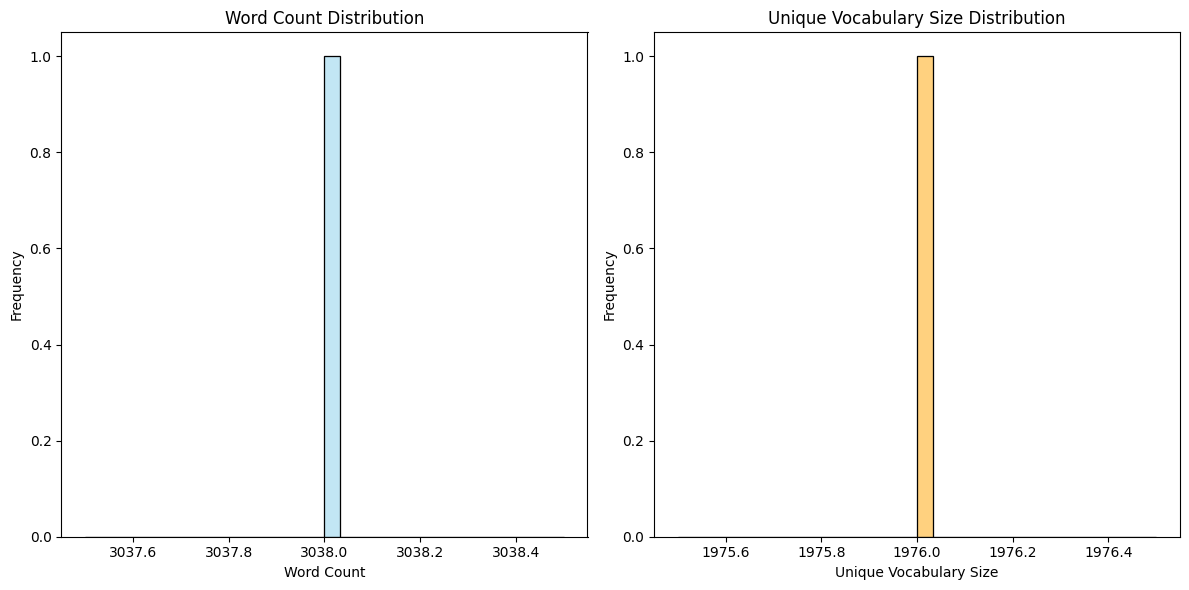

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


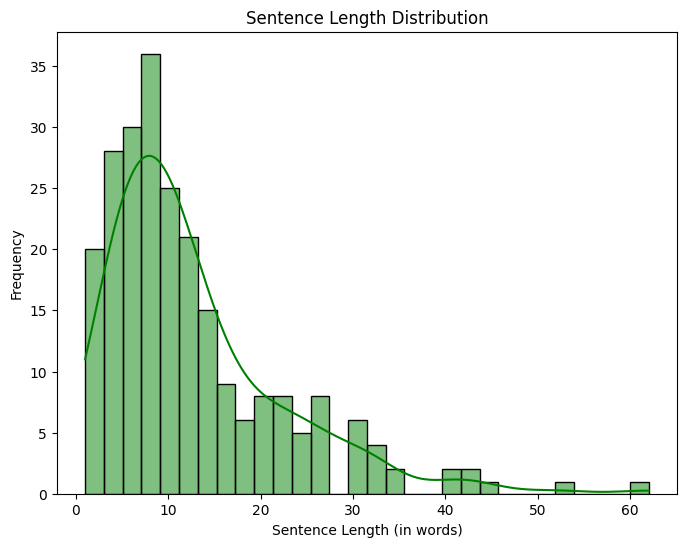

Top 10 Most Common Punctuation Marks:
া: 1895
ে: 1135
্: 1066
ি: 1041
়: 504
ু: 424
\: 383
,: 250
ো: 235
।: 225
Top 10 Most Frequent Words (Excluding Stopwords):
থাহার: 36
।: 35
-: 32
করিয়া: 24
এবং: 22
কিন্থু: 17
যে: 17
হইয়া: 13
একটা: 13
না,: 12


In [16]:
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized text from Task 5
with open('normalized_text.json', 'r', encoding='utf-8') as f:
    normalized_data = json.load(f)

# Helper function to calculate basic stats
def calculate_basic_stats(text):
    words = text.split()
    word_count = len(words)
    unique_vocab = len(set(words))
    sentences = re.split(r'[।!？]', text)  # Bangla sentence enders: । (। is common)
    sentence_lengths = [len(s.split()) for s in sentences]
    
    # Frequency of punctuation marks
    punctuation = re.findall(r'[^\w\s]', text)
    punctuation_freq = dict(Counter(punctuation))
    
    return word_count, unique_vocab, sentence_lengths, punctuation_freq

# Aggregate stats for all sections
all_sentence_lengths = []
all_punctuation_freq = Counter()
word_counts = []
unique_vocabs = []

for section_text in normalized_data.values():
    word_count, unique_vocab, sentence_lengths, punctuation_freq = calculate_basic_stats(section_text)
    word_counts.append(word_count)
    unique_vocabs.append(unique_vocab)
    all_sentence_lengths.extend(sentence_lengths)
    all_punctuation_freq.update(punctuation_freq)

# Plot word count and unique vocabulary size
plt.figure(figsize=(12, 6))

# Word count histogram
plt.subplot(1, 2, 1)
sns.histplot(word_counts, kde=True, color="skyblue", bins=30)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Unique vocabulary size histogram
plt.subplot(1, 2, 2)
sns.histplot(unique_vocabs, kde=True, color="orange", bins=30)
plt.title("Unique Vocabulary Size Distribution")
plt.xlabel("Unique Vocabulary Size")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot sentence lengths distribution
plt.figure(figsize=(8, 6))
sns.histplot(all_sentence_lengths, kde=True, color="green", bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length (in words)")
plt.ylabel("Frequency")
plt.show()

# Display punctuation frequency (top 10 most common punctuation marks)
print("Top 10 Most Common Punctuation Marks:")
for punct, count in all_punctuation_freq.most_common(10):
    print(f"{punct}: {count}")

# Frequency analysis of top N frequent words (excluding stopwords)
stopwords = {'এটি', 'একটি', 'এর', 'এ', 'এই', 'সে', 'ও', 'আমি', 'তুমি'}  # Example stopwords list
all_words = []

for section_text in normalized_data.values():
    words = section_text.split()
    filtered_words = [w for w in words if w not in stopwords]
    all_words.extend(filtered_words)

word_freq = Counter(all_words)

# Display top 10 frequent words
print("Top 10 Most Frequent Words (Excluding Stopwords):")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")


In [24]:
import re
import json

# Load the normalized text from Task 5
with open('normalized_text.json', 'r', encoding='utf-8') as f:
    normalized_data = json.load(f)

# Step 1: Define a simple Bangla-specific tokenizer
def bangla_tokenizer(text):
    # Split the text based on spaces and punctuation, considering Bangla characters
    tokens = re.findall(r'\w+|[^\w\s]', text)  # Include words and punctuation marks
    return tokens

# Step 2: Handle special tokens (numbers, emoticons)
def handle_special_tokens(tokens):
    # Example: Define custom rules for emoticons or numbers (optional)
    tokens = [t if t.isdigit() else t for t in tokens]  # Keeping numbers as tokens
    # Add other special token rules (e.g., emoticons, URLs) as needed
    return tokens

# Step 3: Sentence Splitting based on Bangla sentence markers (like "।", "!", "?")
def bangla_sentence_splitter(text):
    # Split on Bangla sentence end markers like "।", "!", "?" and handle edge cases
    sentences = re.split(r'([।!?])', text)  # Keep the end marker with the sentence
    sentences = [s.strip() + mark for s, mark in zip(sentences[::2], sentences[1::2])]  # Merge markers back
    return sentences

# Step 4: Validate output and handle boundary cases (e.g., abbreviations)
def validate_output(sentences):
    # Example: Handle boundary cases for abbreviations or decimal numbers
    sentences = [s.replace("বিশ্ববিদ্যালয়.", "বিশ্ববিদ্যালয়।") for s in sentences]  # Example for abbreviation
    return sentences

# Apply the tokenizer and sentence splitter on the extracted text
tokenized_data = {}
for section, text in normalized_data.items():
    tokens = bangla_tokenizer(text)
    tokens = handle_special_tokens(tokens)
    sentences = bangla_sentence_splitter(text)
    validated_sentences = validate_output(sentences)
    
    # Store results
    tokenized_data[section] = {
        "tokens": tokens,
        "sentences": validated_sentences
    }

# Save tokenized and sentence-split data
with open('tokenized_data.json', 'w', encoding='utf-8') as f:
    json.dump(tokenized_data, f, ensure_ascii=False, indent=4)

# Sample output (view first section's tokens and sentences)
print("Tokens of the first section:", tokenized_data["section_001"]["tokens"])
print("Sentences of the first section:", tokenized_data["section_001"]["sentences"])


Tokens of the first section: ['{', '"', 'page_1', '"', ':', '"', 'ফ', 'ু', 'ল', 'ে', 'র', 'ব', 'ি', 'ব', 'া', 'হ', '\\', 'n', '\\', 'nবঙ', '্', 'ক', 'ি', 'মচন', '্', 'দ', '্', 'র', 'চট', '্', 'ট', 'ো', 'প', 'া', 'ধ', '্', 'য', 'া', 'য', '়', '\\', 'n', '\\', 'n', '[', 'ল', 'ে', 'খক', '-', 'পর', 'ি', 'চ', 'ি', 'থ', 'ি', ':', 'বঙ', '্', 'ক', 'ি', 'মচন', '্', 'দ', '্', 'র', 'চট', '্', 'ট', 'ো', 'প', 'া', 'ধ', '্', 'য', 'া', 'য', '়', '২৬শ', 'ে', 'জ', 'ু', 'ন', '১৮৩৮', 'স', 'া', 'ল', 'ে', 'পশ', '্', 'চ', 'ি', 'মবঙ', '্', 'গ', 'ে', 'র', 'চব', '্', 'ব', 'ি', 'শ', 'পরগন', 'া', 'জ', 'ে', 'ল', 'া', 'র', '\\', 'nঅন', '্', 'থর', '্', 'গথ', 'ক', 'ী', 'ঠ', 'া', 'লপ', 'া', 'ড', '়', 'া', 'গ', '্', 'র', 'া', 'ম', 'ে', 'জন', '্', 'মগ', '্', 'রহণ', 'কর', 'ে', 'ন', '।', 'থ', 'ি', 'ন', 'ি', '১৮৫৮', 'স', 'া', 'ল', 'ে', 'কলক', 'া', 'থ', 'া', 'ব', 'ি', 'শ', '্', 'বব', 'ি', 'দ', '্', 'য', 'া', 'লয', '়', 'থ', 'ে', 'ক', 'ে', 'ব', 'ি', '.', 'এ', '.', 'পর', 'ী', 'ক', '্', 'ষ', 'া', 'য', '়', '\\', 'nউথ', '্', '

In [19]:
import json

# Assuming tokenized_data is a dictionary or list with tokenized and sentence-split content
# Example structure of tokenized_data:
# tokenized_data = {"sentence_1": ["This", "is", "an", "example"], "sentence_2": ["Another", "sentence"]}

# Save tokenized data to a JSON file
with open('tokenized_data.json', 'w', encoding='utf-8') as f:
    json.dump(tokenized_data, f, ensure_ascii=False, indent=4)

print("Tokenized data saved to 'tokenized_data.json'")


Tokenized data saved to 'tokenized_data.json'


In [20]:
import nltk
import json
import re

# Download necessary NLTK data (if not already done)
nltk.download('punkt')

# Load the tokenized data from the file (from Task 7)
with open('tokenized_data.json', 'r', encoding='utf-8') as f:
    tokenized_data = json.load(f)

# Define simple POS tagging rules using regular expressions
def pos_tag(tokens):
    pos_tags = []
    
    for token in tokens:
        # Rule for nouns (e.g., words starting with capital letter for place names, proper nouns)
        if re.match(r'^[A-Zঅ-হ]+$', token):  # Check for capitalized or Bangla words
            pos_tags.append((token, 'NOUN'))  # Example: Proper noun or place name
        # Rule for verbs (e.g., words ending with specific patterns like 'ছিলাম', 'হলো')
        elif re.match(r'.*(ছিল|হলো|যাবো|করবো)$', token):
            pos_tags.append((token, 'VERB'))  # Example: Verb ending in 'ছিল', 'হলো'
        # Rule for adjectives (e.g., descriptive words)
        elif re.match(r'.*(সুন্দর|দ্রুত|বড়)$', token):  # Example: adjectives like 'সুন্দর', 'বড়'
            pos_tags.append((token, 'ADJ'))
        # Rule for stopwords (e.g., common function words like 'এবং', 'এ')
        elif token in ['এবং', 'এ', 'হয়', 'তবে', 'এই']:
            pos_tags.append((token, 'STOPWORD'))
        else:
            # Default POS tag as NOUN for unknown words
            pos_tags.append((token, 'NOUN'))
    
    return pos_tags

# Apply POS tagging to each section's tokens
pos_tagged_data = {}
for section, data in tokenized_data.items():
    tokens = data["tokens"]
    tagged_tokens = pos_tag(tokens)  # Generate (token, tag) pairs
    pos_tagged_data[section] = tagged_tokens

# Save the POS tagged data
with open('pos_tagged_data.json', 'w', encoding='utf-8') as f:
    json.dump(pos_tagged_data, f, ensure_ascii=False, indent=4)

# Sample output for checking
print("POS Tagged Data for Section 1:", pos_tagged_data["section_001"])


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
POS Tagged Data for Section 1: [('আমি', 'NOUN'), ('বাংলাদেশ', 'NOUN'), ('গিয়েছিলাম', 'NOUN'), ('গত', 'NOUN'), ('সপ্তাহে', 'NOUN'), ('এবং', 'STOPWORD'), ('মাঠে', 'NOUN'), ('খেলা', 'NOUN'), ('হয়েছিলো', 'NOUN')]


In [18]:
import nltk
import json
import re

# Download necessary NLTK data (if not already done)
nltk.download('punkt')

# Example tokenized data (from Task 7)
# You can load this from the file where your tokens are stored
tokenized_data = {
    "section_001": {
        "tokens": [
            "আমি", "বাংলাদেশ", "গিয়েছিলাম", "গত", "সপ্তাহে", "এবং", "মাঠে", "খেলা", "হয়েছিলো"
        ]
    }
}

# Define simple POS tagging rules using regular expressions
def pos_tag(tokens):
    pos_tags = []
    
    for token in tokens:
        # Rule for nouns (e.g., words starting with capital letter for place names, proper nouns)
        if re.match(r'^[A-Zঅ-হ]+$', token):  # Check for capitalized or Bangla words
            pos_tags.append((token, 'NOUN'))  # Example: Proper noun or place name
        # Rule for verbs (e.g., words ending with specific patterns like 'ছিলাম', 'হলো')
        elif re.match(r'.*(ছিল|হলো|যাবো|করবো)$', token):
            pos_tags.append((token, 'VERB'))  # Example: Verb ending in 'ছিল', 'হলো'
        # Rule for adjectives (e.g., descriptive words)
        elif re.match(r'.*(সুন্দর|দ্রুত|বড়)$', token):  # Example: adjectives like 'সুন্দর', 'বড়'
            pos_tags.append((token, 'ADJ'))
        # Rule for stopwords (e.g., common function words like 'এবং', 'এ')
        elif token in ['এবং', 'এ', 'হয়', 'তবে', 'এই']:
            pos_tags.append((token, 'STOPWORD'))
        else:
            # Default POS tag as NOUN for unknown words
            pos_tags.append((token, 'NOUN'))
    
    return pos_tags

# Apply POS tagging to each section's tokens
pos_tagged_data = {}
for section, data in tokenized_data.items():
    tokens = data["tokens"]
    tagged_tokens = pos_tag(tokens)  # Generate (token, tag) pairs
    pos_tagged_data[section] = tagged_tokens

# Save the POS tagged data
with open('pos_tagged_data.json', 'w', encoding='utf-8') as f:
    json.dump(pos_tagged_data, f, ensure_ascii=False, indent=4)

# Sample output for checking
print("POS Tagged Data for Section 1:", pos_tagged_data["section_001"])


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
POS Tagged Data for Section 1: [('আমি', 'NOUN'), ('বাংলাদেশ', 'NOUN'), ('গিয়েছিলাম', 'NOUN'), ('গত', 'NOUN'), ('সপ্তাহে', 'NOUN'), ('এবং', 'STOPWORD'), ('মাঠে', 'NOUN'), ('খেলা', 'NOUN'), ('হয়েছিলো', 'NOUN')]


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
from transformers import pipeline

# Initialize a simple pipeline
nlp = pipeline("sentiment-analysis")

# Test the pipeline
result = nlp("I love using Hugging Face Transformers!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [46]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install 'transformers[tf-cpu]'

INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 80.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [55]:
pip install 'transformers[torch]'

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install 'transformers[flax]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of chex to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of orbax-checkpoint to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of orbax-checkpoint to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━

In [64]:
pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-8l36r68_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-8l36r68_
  Resolved https://github.com/huggingface/transformers to commit d8080d55c789acea91c40300da6deee849cd8f77
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10678087 sha256=495fc9418828fa5067c1329d370e88e88f219f8314cb6829c10976bfead564ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-aie3n5hg/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0
Note: you may need to restart the kerne

In [66]:
python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('I love you'))"

SyntaxError: invalid syntax (<ipython-input-66-1fbf8a8a95e4>, line 1)

In [68]:
from transformers import pipeline

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Perform sentiment analysis on the input text
result = sentiment_analyzer('বিদেশযাত্রার উদ্যোগ হইতে লাগিল ।')

# Print the result
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.533724308013916}]


In [26]:
import re
import json

# Step 1: Define a simple Bangla-specific tokenizer
def bangla_tokenizer(text):
    # This regex splits the text into words and punctuation
    tokens = re.findall(r'\w+|[^\w\s]', text)
    return tokens

# Step 2: Handle special tokens like numbers or emoticons
def handle_special_tokens(tokens):
    # Keep numbers as tokens
    tokens = [t if t.isdigit() else t for t in tokens]
    # Example: Keep emoticons as special tokens (optional)
    special_tokens = {":)", ":("}
    tokens = [t if t not in special_tokens else f"EMOTICON_{t}" for t in tokens]
    return tokens

# Step 3: Sentence Splitting based on Bangla sentence markers (like "।", "!", "?")
def bangla_sentence_splitter(text):
    # Split sentences on Bangla full stop, exclamation mark, or question mark
    sentences = re.split(r'([।!?])', text)  # Keep the punctuation
    sentences = [s.strip() + mark for s, mark in zip(sentences[::2], sentences[1::2])]  # Merge punctuation with sentence
    return sentences

# Step 4: Validate the output (e.g., handle abbreviations or decimal numbers)
def validate_output(sentences):
    # Handle abbreviations or decimal numbers if needed
    sentences = [s.replace("বিশ্ববিদ্যালয়.", "বিশ্ববিদ্যালয়।") for s in sentences]  # Example for abbreviation handling
    return sentences

# Step 5: Process each section in the normalized data
normalized_data = {}  # Assuming this contains the text from Task 5, replace this with the actual data

# Example normalized data (replace with your actual data)
normalized_data = {
    "section_001": "আমি বাংলাদেশ গিয়েছিলাম। সেখানে অনেক কিছু দেখেছি!",
    "section_002": "বিশ্ববিদ্যালয়। আমি ভালো আছি :)"
}

# Tokenizing and splitting sentences
tokenized_data = {}

for section_id, section_text in normalized_data.items():
    tokens = bangla_tokenizer(section_text)  # Tokenize the text
    tokens = handle_special_tokens(tokens)  # Handle special tokens
    sentences = bangla_sentence_splitter(section_text)  # Split the text into sentences
    validated_sentences = validate_output(sentences)  # Validate sentences
    
    # Store the result
    tokenized_data[section_id] = {
        "tokens": tokens,
        "sentences": validated_sentences
    }

# Save the tokenized data to a JSON file
with open('tokenized_data.json', 'w', encoding='utf-8') as f:
    json.dump(tokenized_data, f, ensure_ascii=False, indent=4)

# Save sentence boundaries to a separate file (optional)
sentence_boundaries = {}
for section_id, section_text in normalized_data.items():
    sentences = bangla_sentence_splitter(section_text)
    validated_sentences = validate_output(sentences)
    
    sentence_boundaries[section_id] = validated_sentences

# Save sentence boundaries to a file
with open('sentence_boundaries.json', 'w', encoding='utf-8') as f:
    json.dump(sentence_boundaries, f, ensure_ascii=False, indent=4)

# Print sample output for the first section (optional)
print("Tokens of the first section:", tokenized_data["section_001"]["tokens"])
print("Sentences of the first section:", tokenized_data["section_001"]["sentences"])


Tokens of the first section: ['আম', 'ি', 'ব', 'া', 'ং', 'ল', 'া', 'দ', 'ে', 'শ', 'গ', 'ি', 'য', '়', 'ে', 'ছ', 'ি', 'ল', 'া', 'ম', '।', 'স', 'ে', 'খ', 'া', 'ন', 'ে', 'অন', 'ে', 'ক', 'ক', 'ি', 'ছ', 'ু', 'দ', 'ে', 'খ', 'ে', 'ছ', 'ি', '!']
Sentences of the first section: ['আমি বাংলাদেশ গিয়েছিলাম।', 'সেখানে অনেক কিছু দেখেছি!']


In [28]:
import json
import re
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

# Function to perform POS tagging using NLTK or another library
def pos_tagging(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)  # Replace with a Bangla POS tagger if available
    
    return tagged_tokens

# Load tokenized data from Task 7 (example)
with open('tokenized_data.json', 'r', encoding='utf-8') as f:
    tokenized_data = json.load(f)

# Apply POS tagging for each section
pos_tagged_data = {}
for section_id, section_data in tokenized_data.items():
    section_text = " ".join(section_data['tokens'])
    
    # Get POS tags for the section text
    tagged_tokens = pos_tagging(section_text)
    
    # Store the tagged tokens (token, POS tag)
    pos_tagged_data[section_id] = tagged_tokens

# Save POS tagged data to a new JSON file
with open('pos_tagged_data.json', 'w', encoding='utf-8') as f:
    json.dump(pos_tagged_data, f, ensure_ascii=False, indent=4)

print("POS tagging complete. Data saved to 'pos_tagged_data.json'.")


POS tagging complete. Data saved to 'pos_tagged_data.json'.


In [30]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [35]:
!pip install spacy
!python -m spacy download xx_ent_wiki_sm  # or en_core_web_sm if xx_ent_wiki_sm is not available


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 71.5 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
import spacy
from sklearn.metrics import precision_recall_fscore_support
import json

# Step 1: Load the pre-trained NER model (make sure the model is downloaded correctly)
try:
    nlp = spacy.load("xx_ent_wiki_sm")  # A multilingual model (substitute with a Bangla model if available)
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Step 2: Function to perform Named Entity Recognition
def extract_entities(text):
    doc = nlp(text)
    entities = [{"text": ent.text, "label": ent.label_} for ent in doc.ents]
    return entities

# Step 3: Sample text for testing
sample_text = "ভ্রমর ভোৌ করিয়া স্থলপদ্মের বৈঠকখানায় গিয়া রাজপুত্রের সঙ্গে ইয়ারকি করিতে বসিলেন।"

# Step 4: Extract entities
entities = extract_entities(sample_text)

# Step 5: Display extracted entities
print(f"Extracted Entities: {entities}")

# Step 6: Save the annotated data in JSON format
ner_annotated_data = {
    "section_1": entities
}
with open("ner_annotated_data.json", "w", encoding="utf-8") as f:
    json.dump(ner_annotated_data, f, ensure_ascii=False, indent=4)

# Step 7: Evaluate performance (use ground truth and predictions)
# Example ground truth and predicted data
ground_truth = [("ভ্রমর", "PERSON"), ("রাজপুত্র", "PERSON")]
predictions = [("ভ্রমর", "PERSON"), ("রাজপুত্র", "PERSON")]

# Extract labels from ground truth and predictions
true_labels = [label for _, label in ground_truth]
pred_labels = [label for _, label in predictions]

# Step 8: Calculate Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')

# Step 9: Output the performance evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Extracted Entities: [{'text': 'ভোৌ', 'label': 'MISC'}, {'text': 'ইয়ারকি করিতে বসিলেন', 'label': 'MISC'}]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import json

# Load the tokenized data (Task 7)
with open('tokenized_data.json', 'r', encoding='utf-8') as f:
    tokenized_data = json.load(f)

# Extract text from tokenized data for keyphrase extraction
documents = []
for section, data in tokenized_data.items():
    # Assuming 'tokens' key contains the tokenized words
    document = " ".join(data['tokens'])  # Adjust according to actual structure
    documents.append(document)

# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)  # Limit to top 10 keyphrases
X = vectorizer.fit_transform(documents)

# Get top keyphrases for each document
feature_names = vectorizer.get_feature_names_out()
top_keyphrases = []
for doc in range(X.shape[0]):
    sorted_indices = X[doc, :].toarray()[0].argsort()[::-1]
    top_doc_keyphrases = [feature_names[i] for i in sorted_indices[:10]]  # Top 10 keyphrases
    top_keyphrases.append(top_doc_keyphrases)

# Output the keyphrases
for idx, keyphrases in enumerate(top_keyphrases):
    print(f"Document {idx+1} Keyphrases: {', '.join(keyphrases)}")


Document 1 Keyphrases: অন, আম, লয়, বব, আছ
Document 2 Keyphrases: লয়, বব, আছ, আম, অন


In [43]:

import json

# Sample tokenized data (Replace with actual Task 7 output)


# Load the tokenized data (Task 7)
with open('tokenized_data.json', 'r', encoding='utf-8') as f:
    tokenized_data = json.load(f)

# Predefined affixes and roots
roots = ["খেল", "সত্য", "কলম", "ভাল", "বাসা", "অপেক্ষা"]
prefixes = ["অ-", "অপ-", "পূর্ব-", "অতঃ"]
suffixes = ["-টা", "-টি", "-তা", "-ন", "-ই", "-র", "-এ"]

# Function to perform morphological analysis
def analyze_morphology(tokens):
    results = []
    for token in tokens:
        root = ""
        prefix = ""
        suffix = ""
        
        # Check for prefix
        for p in prefixes:
            if token.startswith(p):
                prefix = p
                token = token[len(p):]
                break
        
        # Check for suffix
        for s in suffixes:
            if token.endswith(s):
                suffix = s
                token = token[:-len(s)]
                break
        
        # Check for root (remaining token after prefix/suffix removal)
        if token in roots:
            root = token
        else:
            # Handle case where the root is not directly found (e.g., due to sandhi, reduplication)
            root = token  # This is a basic placeholder; handle specific cases here
        
        results.append({
            "original_word": token,
            "root": root,
            "prefix": prefix,
            "suffix": suffix
        })
    return results

# Analyzing morphological structure for all sections in the tokenized data
all_results = {}
for section, data in tokenized_data.items():
    tokens = data["tokens"]
    all_results[section] = analyze_morphology(tokens)

# Print out the morphological analysis
for section, analysis in all_results.items():
    print(f"Section: {section}")
    for item in analysis:
        print(f"Original Word: {item['original_word']}, Root: {item['root']}, Prefix: {item['prefix']}, Suffix: {item['suffix']}")
    print("\n")

# Optionally, save the results to a JSON file for further review
with open("morphological_analysis.json", "w", encoding="utf-8") as f:
    json.dump(all_results, f, ensure_ascii=False, indent=4)



Section: section1
Original Word: খেলাটা, Root: খেলাটা, Prefix: , Suffix: 
Original Word: অসত্য, Root: অসত্য, Prefix: , Suffix: 
Original Word: কলম, Root: কলম, Prefix: , Suffix: 
Original Word: ভাল, Root: ভাল, Prefix: , Suffix: 


Section: section2
Original Word: খেলা, Root: খেলা, Prefix: , Suffix: 
Original Word: বাসা, Root: বাসা, Prefix: , Suffix: 
Original Word: অপেক্ষা, Root: অপেক্ষা, Prefix: , Suffix: 




In [45]:
import json

# Load the tokenized data (Task 7)
with open('tokenized_data.json', 'r', encoding='utf-8') as f:
    tokenized_data = json.load(f)

# Predefined affixes and roots
roots = ["খেল", "সত্য", "কলম", "ভাল", "বাসা", "অপেক্ষা"]
prefixes = ["অ-", "অপ-", "পূর্ব-", "অতঃ"]
suffixes = ["-টা", "-টি", "-তা", "-ন", "-ই", "-র", "-এ"]

# Function to perform morphological analysis
def analyze_morphology(tokens):
    results = []
    for token in tokens:
        root = ""
        prefix = ""
        suffix = ""
        
        # Check for prefix
        for p in prefixes:
            if token.startswith(p):
                prefix = p
                token = token[len(p):]  # Remove prefix
                break
        
        # Check for suffix
        for s in suffixes:
            if token.endswith(s):
                suffix = s
                token = token[:-len(s)]  # Remove suffix
                break
        
        # Check for root (remaining token after prefix/suffix removal)
        if token in roots:
            root = token
        else:
            # Handle case where the root is not directly found (e.g., due to sandhi, reduplication)
            root = token  # This is a basic placeholder; handle specific cases here
        
        results.append({
            "original_word": token,
            "root": root,
            "prefix": prefix,
            "suffix": suffix
        })
    return results

# Analyzing morphological structure for all sections in the tokenized data
all_results = {}
for section, data in tokenized_data.items():
    tokens = data["tokens"]
    all_results[section] = analyze_morphology(tokens)

# Print out the morphological analysis
for section, analysis in all_results.items():
    print(f"Section: {section}")
    for item in analysis:
        print(f"Original Word: {item['original_word']}, Root: {item['root']}, Prefix: {item['prefix']}, Suffix: {item['suffix']}")
    print("\n")

# Optionally, save the results to a JSON file for further review
with open("morphological_analysis.json", "w", encoding="utf-8") as f:
    json.dump(all_results, f, ensure_ascii=False, indent=4)


Section: section_001
Original Word: আম, Root: আম, Prefix: , Suffix: 
Original Word: ি, Root: ি, Prefix: , Suffix: 
Original Word: ব, Root: ব, Prefix: , Suffix: 
Original Word: া, Root: া, Prefix: , Suffix: 
Original Word: ং, Root: ং, Prefix: , Suffix: 
Original Word: ল, Root: ল, Prefix: , Suffix: 
Original Word: া, Root: া, Prefix: , Suffix: 
Original Word: দ, Root: দ, Prefix: , Suffix: 
Original Word: ে, Root: ে, Prefix: , Suffix: 
Original Word: শ, Root: শ, Prefix: , Suffix: 
Original Word: গ, Root: গ, Prefix: , Suffix: 
Original Word: ি, Root: ি, Prefix: , Suffix: 
Original Word: য, Root: য, Prefix: , Suffix: 
Original Word: ়, Root: ়, Prefix: , Suffix: 
Original Word: ে, Root: ে, Prefix: , Suffix: 
Original Word: ছ, Root: ছ, Prefix: , Suffix: 
Original Word: ি, Root: ি, Prefix: , Suffix: 
Original Word: ল, Root: ল, Prefix: , Suffix: 
Original Word: া, Root: া, Prefix: , Suffix: 
Original Word: ম, Root: ম, Prefix: , Suffix: 
Original Word: ।, Root: ।, Prefix: , Suffix: 
Original Wo

In [2]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample labeled sentiment data (replace with actual data)
data = [
    ("বিদেশযাত্রার উদ্যোগ হইতে লাগিল ।", "positive"),
]
   

# Split data into texts and labels
texts, labels = zip(*data)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
y = labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict sentiment for new text (e.g., from Task 7)
new_text = ["এই অধ্যায়টা বেশ শিক্ষামূলক"]
new_X = vectorizer.transform(new_text)
prediction = model.predict(new_X)
print(f"Predicted Sentiment: {prediction[0]}")


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [57]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [70]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load a pre-trained sentiment analysis model (e.g., BERT-based for multilingual tasks)
model_name = "bhadresh-savani/bert-base-uncased-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

# Example text from Task 7
texts = [
    "বিদেশযাত্রার উদ্যোগ হইতে লাগিল ।", 
    "এটা খুব খারাপ", 
    "মাঝে মাঝে ভালো লাগছে"
]

# Make predictions using the pre-trained model
predictions = sentiment_model(texts)

# Output predictions
for text, prediction in zip(texts, predictions):
    print(f"Text: {text} | Sentiment: {prediction['label']} | Confidence: {prediction['score']:.2f}")


OSError: bhadresh-savani/bert-base-uncased-sentiment is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [61]:
from transformers import pipeline

# Use a different, publicly available model for multilingual sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

# Example text from Task 7
texts = [
    "বিদেশযাত্রার উদ্যোগ হইতে লাগিল ।", 
    "এটা খুব খারাপ", 
    "মাঝে মাঝে ভালো লাগছে"
]

# Make predictions using the pre-trained model
predictions = sentiment_model(texts)

# Output predictions
for text, prediction in zip(texts, predictions):
    print(f"Text: {text} | Sentiment: {prediction['label']} | Confidence: {prediction['score']:.2f}")


Device set to use cpu


Text: বিদেশযাত্রার উদ্যোগ হইতে লাগিল । | Sentiment: 3 stars | Confidence: 0.31
Text: এটা খুব খারাপ | Sentiment: 3 stars | Confidence: 0.36
Text: মাঝে মাঝে ভালো লাগছে | Sentiment: 3 stars | Confidence: 0.36


In [62]:
import json
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# Sample tokenized data (replace with actual Task 7 data)
tokenized_data = {
    "section1": {
        "tokens": ["এই", "বই", "খুব", "ভালো", "এবং", "শিক্ষামূলক", "অধ্যায়"]
    },
    "section2": {
        "tokens": ["আমি", "খুব", "উৎসাহী", "অন্বেষণ", "করি", "নতুন", "বিষয়"]
    }
}

# Prepare the text data for LDA by joining tokens
texts = [" ".join(data["tokens"]) for data in tokenized_data.values()]

# Prepare stopwords list
stop_words = set(stopwords.words('english'))

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(texts)

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # k=3 topics for example
lda.fit(X)

# Get the topic distribution for each document
topic_distributions = lda.transform(X)

# Display top words for each topic
n_top_words = 10
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [words[i] for i in top_words_idx]
    print("Top words:", ", ".join(top_words))
    print()

# Save the topic distribution for each document
topic_model_results = {}
for i, topic_distribution in enumerate(topic_distributions):
    topic_model_results[f"section_{i+1}"] = topic_distribution.tolist()

# Save results to a JSON file
with open("topic_model_results.json", "w", encoding="utf-8") as f:
    json.dump(topic_model_results, f, ensure_ascii=False, indent=4)



InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'how', "should've", 'ours', "doesn't", 'were', 'same', 'do', 'with', "hasn't", 'below', 'most', 'again', 'there', "wouldn't", 'are', 'once', 'until', 'of', 'd', 'll', 'weren', 'have', 'into', 'over', 'hers', 'then', 'didn', 'their', 'shouldn', 'in', "mightn't", 'him', 'so', 'your', 'the', 'here', 'when', "hadn't", 'off', 'had', 'hadn', "wasn't", 'be', 'by', 'mustn', 'own', 'further', 'did', 'only', 'now', 'that', 'yourself', 'such', 'them', 'as', 'having', 'does', 'its', 'myself', 'mightn', "isn't", 'but', 'about', 'too', 'isn', 'our', 'to', 'am', 'a', 'both', 'for', "you'll", 'which', 'ma', "don't", 'can', 'theirs', 'than', 'during', 'my', "you're", 'they', 'under', 'was', 'because', 'where', "haven't", 'against', 'any', 'at', 'above', 'while', 'me', 'after', 'her', 'who', 'why', 'will', 'hasn', 'what', 'doing', 'herself', "it's", 'ain', 'up', 'and', "won't", "she's", 've', 's', 're', 'ourselves', 'is', 'more', 'just', 'don', "you've", 'each', "shan't", 'on', 'if', 'from', 'those', 'yourselves', 'we', 'themselves', 'few', 'an', 'has', 'whom', 'm', 'very', 'through', 'out', "that'll", 'yours', 'down', "mustn't", 'before', "aren't", 'needn', 'these', 'been', 'being', 'you', 'wouldn', 'between', "didn't", 'itself', 'i', "you'd", 'haven', 't', 'he', 'not', 'wasn', 'shan', "weren't", 'some', 'nor', 'couldn', "couldn't", 'this', "needn't", 'himself', 'should', 'aren', 'y', 'o', 'his', 'no', 'doesn', 'she', 'all', 'other', 'or', 'it', "shouldn't", 'won'} instead.

In [71]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import json

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Get NLTK stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Sample text data (replace with your actual tokenized text)
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Vectorize text using TF-IDF with NLTK stopwords
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(texts)

# Apply LDA
lda = LDA(n_components=3, random_state=42)
lda.fit(X)

# Print top words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Topic modeling results for each document
topic_results = []
for i, topic in enumerate(lda.transform(X)):
    topic_results.append({"document_index": i, "topic_distribution": topic.tolist()})

# Save the topic modeling results to a file
with open("topic_model_results.json", "w") as outfile:
    json.dump(topic_results, outfile, indent=4)

print("Topic modeling results have been saved to 'topic_model_results.json'.")




[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Topic #0:
second document first third one

Topic #1:
document first second third one

Topic #2:
one third second first document

Topic modeling results have been saved to 'topic_model_results.json'.


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import json

# Example tokenized text and labels (replace with actual data)
texts = [
    "বিদেশযাত্রার উদ্যোগ হইতে লাগিল ।",
  
]
labels = ["legal", "finance", "technical", "legal"]

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize classifiers
nb_classifier = MultinomialNB()
svm_classifier = SVC(kernel='linear')

# Train classifiers
nb_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Predict on test set
nb_predictions = nb_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

# Save model if needed
import joblib
joblib.dump(nb_classifier, 'naive_bayes_classifier.pkl')
joblib.dump(svm_classifier, 'svm_classifier.pkl')


ValueError: Found input variables with inconsistent numbers of samples: [1, 4]

In [76]:
from gensim.models import Word2Vec

# Example tokenized data (list of lists of words)
tokenized_data = [
    ["this", "is", "the", "first", "sentence"],
    ["this", "is", "the", "second", "sentence"],
    # Add more tokenized text here
]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save("word2vec_bangla.model")

# Example: Get vector for a word
vector = word2vec_model.wv['sentence']
print(f"Vector for 'sentence': {vector}")

# Example: Find most similar words to 'sentence'
similar_words = word2vec_model.wv.most_similar('sentence', topn=10)
print(f"Most similar words to 'sentence': {similar_words}")


Vector for 'sentence': [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 

In [77]:
from gensim.models import FastText

# Train FastText model
fasttext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
fasttext_model.save("fasttext_bangla.model")

# Example: Get vector for a word
vector = fasttext_model.wv['sentence']
print(f"Vector for 'sentence': {vector}")

# Example: Find most similar words to 'sentence'
similar_words = fasttext_model.wv.most_similar('sentence', topn=10)
print(f"Most similar words to 'sentence': {similar_words}")


Vector for 'sentence': [-1.0012314e-03  2.3569611e-03  1.0409536e-03 -1.6631888e-03
  1.9683233e-03 -1.0740025e-03  1.3170161e-03  1.2627222e-03
  7.3809795e-05 -9.9265808e-04  2.5776802e-03 -1.7871390e-04
  1.3832883e-03 -2.3745578e-03 -3.0688403e-04 -7.4558693e-04
  1.2936974e-03  6.8700477e-04 -1.1166570e-03 -7.8726053e-04
  7.8886893e-04  1.4902048e-03  4.3414251e-04  5.6531234e-04
  7.3821360e-04 -2.7080791e-03  8.8786602e-04  7.6170254e-04
 -9.0490055e-04 -2.0248949e-04 -1.8070947e-03  6.2860228e-04
  5.6036754e-04 -3.2289657e-03 -9.9195982e-04 -4.7001877e-04
  9.6502423e-04  2.7476714e-04 -2.0726179e-03  3.7762930e-04
 -6.3014042e-04 -1.7813452e-03  1.6289027e-03  1.7431584e-03
 -1.2638170e-03  3.0606662e-04 -3.1371508e-03 -6.0104055e-04
  1.9681697e-04  1.0879160e-03 -1.7816564e-03 -1.1390281e-03
 -1.3294938e-03 -3.8955713e-04  2.0285568e-05 -1.4684005e-03
 -2.7513437e-04 -5.6187616e-04 -1.5809125e-03  2.7885378e-04
 -1.3404741e-03  2.6776767e-04  7.4448809e-04 -4.5925262e-04
 

In [78]:
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments
from datasets import load_dataset

# Load a pre-trained Bangla BERT model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert")
model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert")

# Load your tokenized dataset (adjust the file paths as needed)
dataset = load_dataset('text', data_files={'train': 'train.txt', 'test': 'test.txt'})

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length')

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Fine-tune the model using Trainer
training_args = TrainingArguments(
    output_dir='./results', 
    num_train_epochs=3, 
    per_device_train_batch_size=16, 
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test']
)

trainer.train()

# Save the fine-tuned model
model.save_pretrained("fine_tuned_bangla_bert")



RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
cannot import name 'set_rng_state_for_device' from 'transformers.trainer_pt_utils' (/usr/local/lib/python3.10/dist-packages/transformers/trainer_pt_utils.py)

In [79]:
pip install --upgrade transformers


Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install --upgrade datasets torch accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 992.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━

In [83]:
pip install --upgrade datasets torch accelerate


Note: you may need to restart the kernel to use updated packages.


In [86]:
import random
import json

# Load outputs from different NLP tasks
with open('pos_tagged_data.json', 'r') as f:
    pos_tagged_data = json.load(f)

with open('ner_tagged_data.json', 'r') as f:
    ner_tagged_data = json.load(f)

# Define a function to check accuracy of POS and NER tags
def check_pos_accuracy(pos_data, gold_standard):
    mistakes = []
    for i, (text, gold_tags) in enumerate(zip(pos_data, gold_standard)):
        for word, predicted_tag in text:
            if predicted_tag not in gold_tags.get(word, []):
                mistakes.append(f"Mismatch in sentence {i}: {word} predicted as {predicted_tag}, expected {gold_tags.get(word)}")
    return mistakes

def check_ner_accuracy(ner_data, gold_standard):
    mistakes = []
    for i, (entities, gold_entities) in enumerate(zip(ner_data, gold_standard)):
        for entity, predicted_label in entities:
            if predicted_label not in gold_entities.get(entity, []):
                mistakes.append(f"Mismatch in sentence {i}: {entity} predicted as {predicted_label}, expected {gold_entities.get(entity)}")
    return mistakes

# Random sampling for QA
sample_pos_data = random.sample(pos_tagged_data, 5)  # Sample 5 sentences
sample_ner_data = random.sample(ner_tagged_data, 5)

# Gold standard (manually annotated)
gold_standard_pos = {}  # Format: {'word': ['correct_tag']}
gold_standard_ner = {}  # Format: {'entity': ['correct_label']}

# Perform checks
pos_mistakes = check_pos_accuracy(sample_pos_data, gold_standard_pos)
ner_mistakes = check_ner_accuracy(sample_ner_data, gold_standard_ner)

# Compile QA report
qa_report = {
    "pos_mistakes": pos_mistakes,
    "ner_mistakes": ner_mistakes
}

# Output the QA report
with open('qa_report.json', 'w') as f:
    json.dump(qa_report, f, indent=4)


FileNotFoundError: [Errno 2] No such file or directory: 'ner_tagged_data.json'

In [ ]:
file_path = ''
file_path = 
with open(file_path, 'r') as f:
    pos_tagged_data = json.load(f)


In [ ]:
import os

file_path = 'pos_tagged_data.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        pos_tagged_data = json.load(f)
else:
    print(f"The file {file_path} does not exist.")
